# Task 1: Prediction using Supervised ML

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

## Reading the Data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## EDA

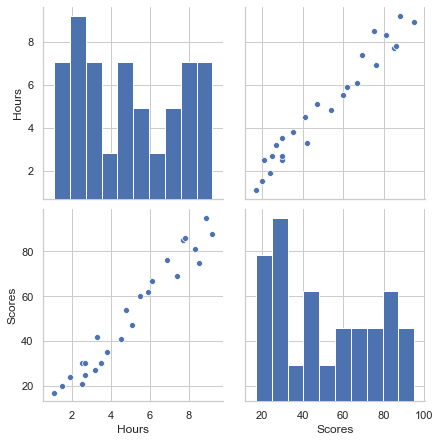

In [21]:
sns.set(style='whitegrid')
sns.pairplot(df,height=3)

##### Let's see how 'Hours' and 'Scores' are correlated

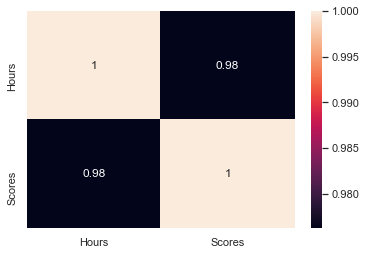

In [32]:
sns.heatmap(df.corr(),annot=True)

So we see that 'Heat' and 'Scores' are about 98% correlated with each other

## Train Test Split

In [52]:
X = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values.reshape(-1,1)

In [33]:
from sklearn.model_selection import train_test_split

In [53]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

## Modelling using Sklearn

In [35]:
from sklearn.linear_model import LinearRegression

In [54]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
#Finding the coefficient of the linear Regression
lm.coef_

array([[9.96651548]])

This can be interpreted as with 1 hour increase in Study Hour then the Score will increase by approx 10 i.e. (9.996)

In [58]:
#Finding the Intercept
lm.intercept_

array([2.10249307])

This Interpretes that if one does not spent any Hour studying then we will be able to score approx 2

## Model Evaluation

In [67]:
#Prediction
prediction = lm.predict(X)

In [78]:
#Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(f'The Mean Absolute Error is:',mean_absolute_error(y,prediction))
print(f'The Mean Squared Error is:',mean_squared_error(y,prediction))

The Mean Absolute Error is: 4.958281939666985
The Mean Squared Error is: 29.435604116246278


## Final Plot of Regression

The Intercept is 2.1024930747922284
The Coefficient is 9.966515478980854


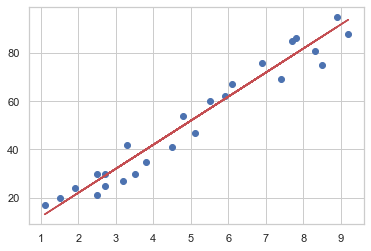

In [77]:
plt.scatter(X,y)
plt.plot(X,prediction,'r')
print(f'The Intercept is {lm.intercept_[0]}')
print(f'The Coefficient is {lm.coef_[0][0]}')

## Question: What will be predicted score if a student studies for 9.25 hrs/ day?

In [86]:
p = lm.predict(np.array([[9.25]]))
print(f'The predicted score of the student studying for 9.25 hrs/ day will be:',p[0][0].round(1))

The predicted score of the student studying for 9.25 hrs/ day will be: 94.3
